# Introduction

In [1]:
%%python

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
%%python

from IPython.display import display, Markdown, Latex

display(Markdown('*some markdown* $\phi$'))


*some markdown* $\phi$


# Initialization

In [3]:
%%cpp -d

#include "QA_Draw_Utility.C"

#include <sPhenixStyle.C>

#include <TFile.h>
#include <TLine.h>
#include <TString.h>
#include <TTree.h>
#include <cassert>
#include <cmath>

In [4]:
SetsPhenixStyle();
TVirtualFitter::SetDefaultFitter("Minuit2");

// test sPHENIX lib load
// gSystem->Load("libg4eval.so");

// test libs
// gSystem->ListLibraries();

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


## Inputs and file checks

In [5]:
const char *qa_file_name_new =
    "G4sPHENIX_e-_pT4_Sum15_qa.root";

const char *qa_file_name_ref =
    "reference/G4sPHENIX_e-_pT4_Sum15_qa.root";


In [6]:

TFile *qa_file_new = new TFile(qa_file_name_new);
assert(qa_file_new->IsOpen());

if (qa_file_new == nullptr) 
{
    cout <<"Error, can not open QA root file"<<qa_file_name_new<<endl;
    exit(1);
}

// list inputs histograms if needed
// qa_file_new ->ls();

TFile *qa_file_ref = NULL;
if (qa_file_name_ref)
{
    qa_file_ref = new TFile(qa_file_name_ref);
    
    
    if (qa_file_ref == nullptr) 
    {
        cout <<"Error, can not open QA root file"<<qa_file_name_ref<<endl;
        exit(1);
    }
}

# CEMC

Central EMCal checks

## CEMC G4 hits

Low level Geant4 simulation check for the CEMC

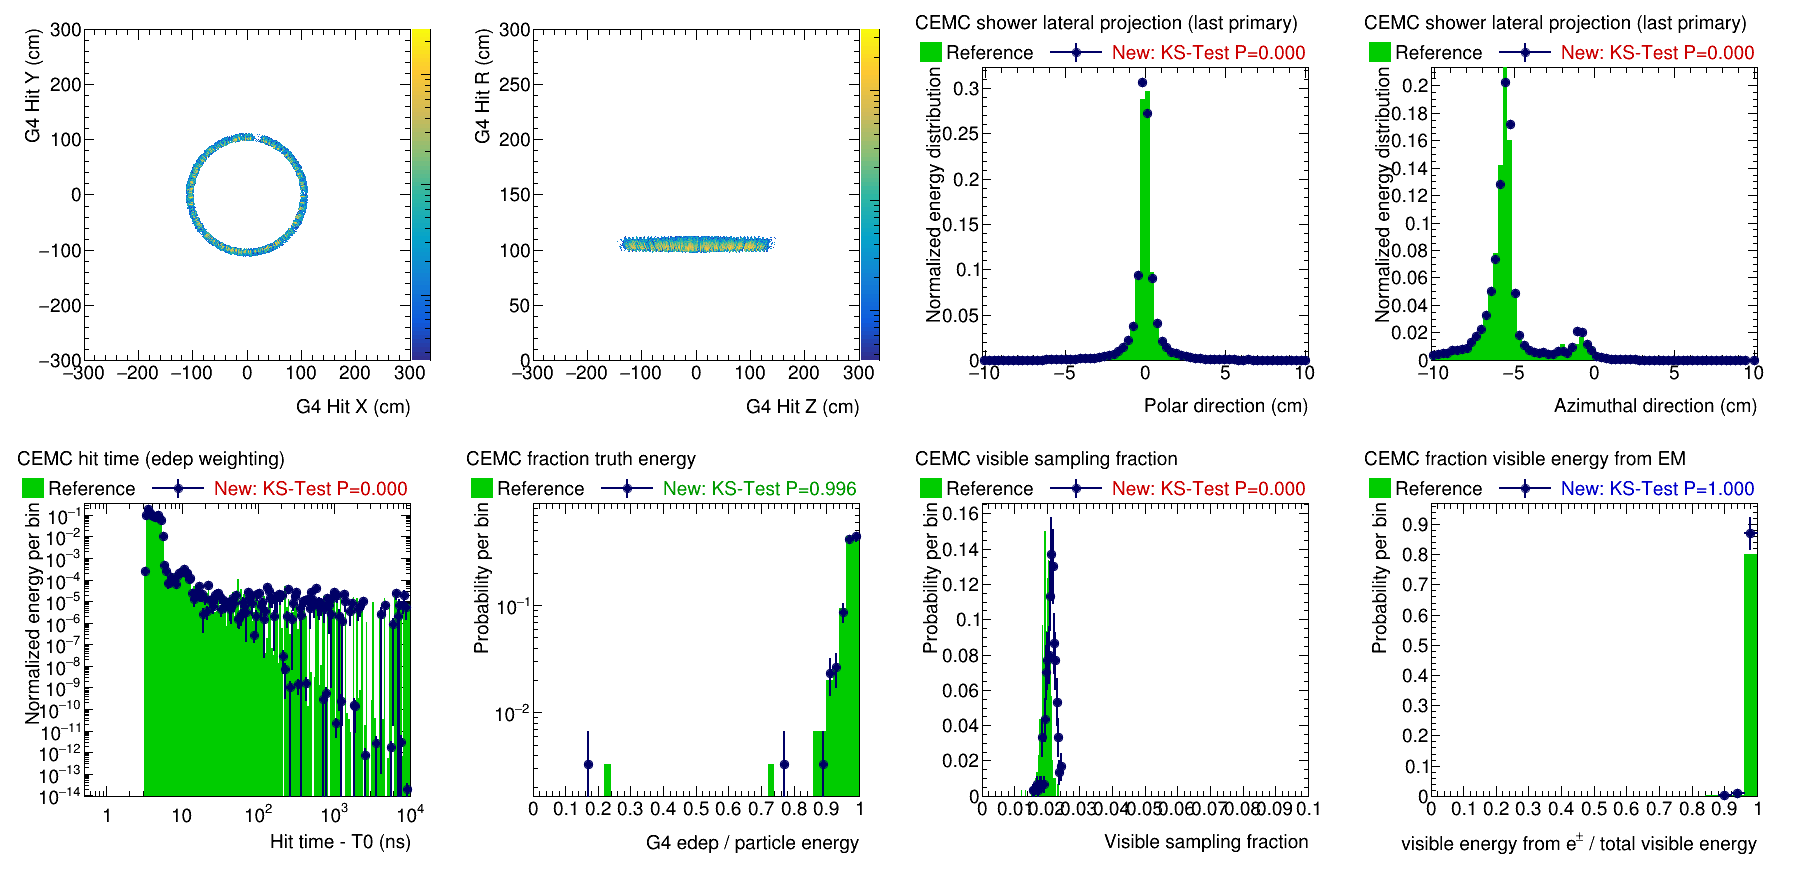

 Kolmo Prob  h1 = qa_file_new_h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection_px, sum bin content =0.998522  effective entries =174543
 Kolmo Prob  h2 = qa_file_ref_h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection_px, sum bin content =0.997728  effective entries =147169
 Kolmo Prob     = 0, Max Dist = 0.0303445
 Kolmo Prob  h1 = qa_file_new_h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection_py, sum bin content =0.996672  effective entries =174160
 Kolmo Prob  h2 = qa_file_ref_h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection_py, sum bin content =0.996949  effective entries =147017
 Kolmo Prob     = 1.5051e-18, Max Dist = 0.0161781
 Kolmo Prob  h1 = h_QAG4Sim_CEMC_G4Hit_HitTime, sum bin content =0.99998  effective entries =174852
 Kolmo Prob  h2 = h_QAG4Sim_CEMC_G4Hit_HitTime, sum bin content =0.999982  effective entries =147374
 Kolmo Prob     = 0, Max Dist = 0.0275839
 Kolmo Prob  h1 = h_QAG4Sim_CEMC_G4Hit_FractionTruthEnergy, sum bin content =1  effective entries =300
 Kolmo Prob  h2 = h_QAG4Sim_CEMC_G4Hi

Info in <TCanvas::Print>: png file G4sPHENIX_e-_pT4_Sum15_qa.rootQA_Draw_CEMC_G4Hit.png has been created
Info in <TCanvas::SaveAs>: ROOT file G4sPHENIX_e-_pT4_Sum15_qa.rootQA_Draw_CEMC_G4Hit.root has been created
Info in <TCanvas::Print>: SVG file G4sPHENIX_e-_pT4_Sum15_qa.rootQA_Draw_CEMC_G4Hit.svg has been created


In [7]:
{
    TCanvas *c1 = new TCanvas("QA_Draw_CEMC_G4Hit", "QA_Draw_CEMC_G4Hit", 1800, 900);
  c1->Divide(4, 2);
  int idx = 1;
  TPad *p;

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();

  TH2F *h_QAG4Sim_CEMC_G4Hit_XY = (TH2F *) qa_file_new->GetObjectChecked(
      "h_QAG4Sim_CEMC_G4Hit_XY", "TH2F");
  assert(h_QAG4Sim_CEMC_G4Hit_XY);
  h_QAG4Sim_CEMC_G4Hit_XY->GetYaxis()->SetTitleOffset(1.5);
  h_QAG4Sim_CEMC_G4Hit_XY->Draw("COLZ");

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();

  TH2F *h_QAG4Sim_CEMC_G4Hit_RZ = (TH2F *) qa_file_new->GetObjectChecked(
      "h_QAG4Sim_CEMC_G4Hit_RZ", "TH2F");
  assert(h_QAG4Sim_CEMC_G4Hit_RZ);
  h_QAG4Sim_CEMC_G4Hit_RZ->GetYaxis()->SetTitleOffset(1.5);
  h_QAG4Sim_CEMC_G4Hit_RZ->Draw("COLZ");

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH2F *h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection", "TH2F");
    assert(h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection);

    TH1D *proj_new =
        h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection->ProjectionX(
            "qa_file_new_h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection_px");

    proj_new->Scale(1. / proj_new->GetSum());

    TH1D *proj_ref = NULL;
    if (qa_file_ref)
    {
      TH2F *h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection =
          (TH2F *) qa_file_ref->GetObjectChecked(
              "h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection", "TH2F");
      assert(h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection);

      proj_ref = h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection->ProjectionX(
          "qa_file_ref_h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection_px");
      proj_ref->Scale(1. / proj_ref->GetSum());
    }

    proj_new->GetYaxis()->SetTitle("Normalized energy distribution");
    proj_new->GetXaxis()->SetRangeUser(-10, 10);

    DrawReference(proj_new, proj_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH2F *h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection", "TH2F");
    assert(h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection);

    TH1D *proj_new =
        h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection->ProjectionY(
            "qa_file_new_h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection_py");

    proj_new->Scale(1. / proj_new->GetSum());

    TH1D *proj_ref = NULL;
    if (qa_file_ref)
    {
      TH2F *h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection =
          (TH2F *) qa_file_ref->GetObjectChecked(
              "h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection", "TH2F");
      assert(h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection);

      proj_ref = h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection->ProjectionY(
          "qa_file_ref_h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection_py");
      proj_ref->Scale(1. / proj_ref->GetSum());
    }

    proj_new->GetYaxis()->SetTitle("Normalized energy distribution");
    proj_new->GetXaxis()->SetRangeUser(-10, 10);

    DrawReference(proj_new, proj_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CEMC_G4Hit_HitTime", "TH1F");
    assert(h_new);

    h_new->Rebin(5);
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CEMC_G4Hit_HitTime", "TH1F");
      assert(h_ref);

      h_ref->Rebin(5);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Normalized energy per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //    p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CEMC_G4Hit_FractionTruthEnergy", "TH1F");
    assert(h_new);

    h_new->Rebin(20);
    //h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CEMC_G4Hit_FractionTruthEnergy", "TH1F");
      assert(h_ref);

      h_ref->Rebin(20);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CEMC_G4Hit_VSF", "TH1F");
    assert(h_new);

    h_new->Rebin(2);
    //h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CEMC_G4Hit_VSF", "TH1F");
      assert(h_ref);

      h_ref->Rebin(2);
      //h_ref->Sumw2();
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CEMC_G4Hit_FractionEMVisibleEnergy", "TH1F");
    assert(h_new);

    h_new->Rebin(4);
    //h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CEMC_G4Hit_FractionEMVisibleEnergy", "TH1F");
      assert(h_ref);

      h_ref->Rebin(4);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //          h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  c1->Draw();
//  PutInputFileName(c1, .04, qa_file_name_new, qa_file_name_ref);
  // SaveCanvas(c1, TString(qa_file_name_new) + TString(c1->GetName()), true);
    
}